## Całkowanie numeryczne podstawy 

#### Imports:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów
* wzór trapezów
* wzór Simpsona

In [4]:
def calculate_dx(a, b, n):
    return (b - a) / float(n)

def rect_rule (f, a, b, n):
    result = 0.0
    dx = calculate_dx(a, b, n)
    for i in range (0, n):
        result = result + f((a + (i*dx)))
    return dx*result

def trapez_rule(f, a, b, n):
    dx = calculate_dx(a, b, n)
    s = 0.5*(f(a) + f(b))
    for i in range(1, n):
        s = s + f(a + i*dx)
    return dx*s

def simps_rule(f, a, b, n):
    dx = calculate_dx(a, b, n)
    s1 = 0
    for i in range(1, n/2 + 1):
        s1 += f(a + (2*i - 1)*dx)
    s1 *= 4
    s2 = 0
    for i in range(1, n/2): 
        s2 += f(a + 2*i*dx)
    s2 *= 2
    return (b - a)/(3.0*n)*(f(a) + f(b) + s1 + s2)

#### Zadanie 2"
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)

In [5]:
def show_graphic(f, f_name, a, b, n):
    x = np.linspace(a, b, n)
    y = np.vectorize(f)(x)
    plt.title(f_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.plot(x, y, label = f_name)
    plt.show()
    
def relative_error(calculated_val, precise_val):
    return abs(calculated_val - precise_val) / abs(precise_val)

def calc_func(f, f_name, a, b, n):
    show_graphic(f, f_name, a, b, n)
    
    precise_val = integrate.quad(f, a, b)[0]
    rect_val = rect_rule(f, a, b, n)
    trapez_val = trapez_rule(f, a, b, n)
    simps_val = simps_rule(f, a, b, n)
    
    print("Precise value:", precise_val)
    print("Rectangular rule:", rect_val, "Relative error:", relative_error(rect_val, precise_val))
    print("Trapezoidal rule:", trapez_val, "Relative error:", relative_error(trapez_val, precise_val))
    print("Simpson's rule:", simps_val, "Relative error:", relative_error(simps_val, precise_val))
    
      

def calculate(a, b, n):  
    calc_func(lambda x: x, "f(x) = x", a, b, n)
    calc_func(lambda x: 2 * x ** 2, "f(x) = 2 * x^2", a, b, n)
    calc_func(lambda x: 4 * math.sin(x), "f(x) = 4 * sin(x)", a, b, n)
    calc_func(lambda x: math.exp(x), "f(x) = e^x", a, b, n)
    calc_func(lambda x: x * math.sin(x) ** 2 + 2 * math.cos(x), "f(x) = x * sin^2(x) + 2 * cos(x)", a, b, n)
    calc_func(lambda x: math.cos((x + 1) / (x ** 2 + 0.04)) * math.exp(x), "f(x) = cos((x + 1)/(x^2 + 0.004)) * e^x", a, b, n)

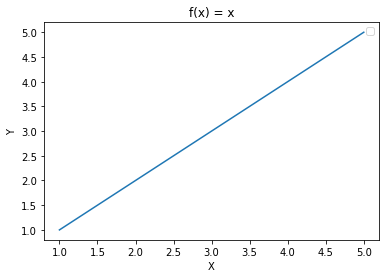

('Precise value:', 12.0)
('Rectangular rule:', 11.200000000000001, 'Relative error:', 0.06666666666666658)
('Trapezoidal rule:', 12.0, 'Relative error:', 0.0)
("Simpson's rule:", 12.0, 'Relative error:', 0.0)


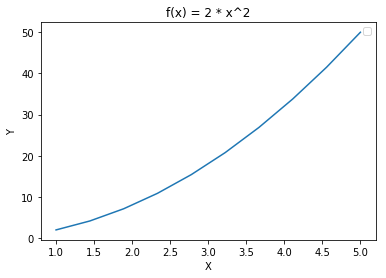

('Precise value:', 82.66666666666666)
('Rectangular rule:', 73.28, 'Relative error:', 0.11354838709677408)
('Trapezoidal rule:', 82.88, 'Relative error:', 0.0025806451612903824)
("Simpson's rule:", 82.66666666666667, 'Relative error:', 1.7190550058712103e-16)


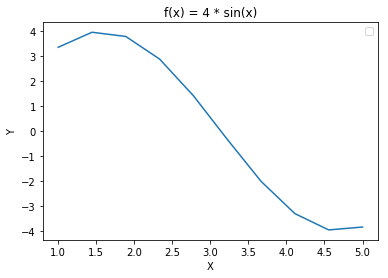

('Precise value:', 1.0265604816196536)
('Rectangular rule:', 2.453152576574192, 'Relative error:', 1.3896814854042852)
('Trapezoidal rule:', 1.0128363689973638, 'Relative error:', 0.013369024882622206)
("Simpson's rule:", 1.0267093097760918, 'Relative error:', 0.00014497748462254914)


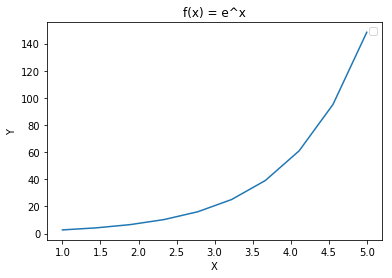

('Precise value:', 145.69487727411754)
('Rectangular rule:', 118.49333957635878, 'Relative error:', 0.18670208731210533)
('Trapezoidal rule:', 147.6323150311823, 'Relative error:', 0.013297912687894656)
("Simpson's rule:", 145.71521016070847, 'Relative error:', 0.0001395580062342622)


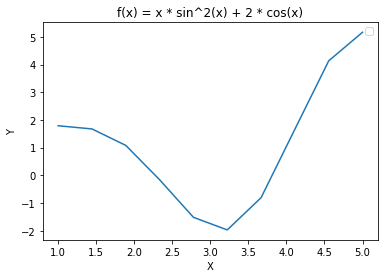

('Precise value:', 3.3594258129422263)
('Rectangular rule:', 2.6862956889152247, 'Relative error:', 0.20037058756700626)
('Trapezoidal rule:', 3.3615607216367724, 'Relative error:', 0.0006354980920612605)
("Simpson's rule:", 3.3607257008730533, 'Relative error:', 0.00038693753135407636)


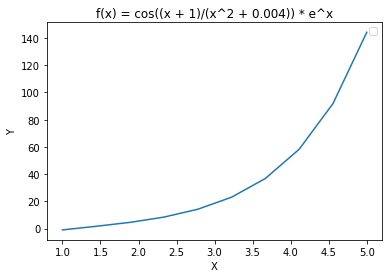

('Precise value:', 135.71714406473345)
('Rectangular rule:', 108.55627938572157, 'Relative error:', 0.20012847209676674)
('Trapezoidal rule:', 137.57843256636698, 'Relative error:', 0.013714468532772495)
("Simpson's rule:", 135.73896201607988, 'Relative error:', 0.00016076046616504366)


In [6]:
calculate(1, 5, 10)

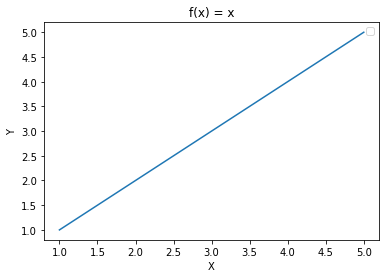

('Precise value:', 12.0)
('Rectangular rule:', 11.92, 'Relative error:', 0.006666666666666672)
('Trapezoidal rule:', 12.0, 'Relative error:', 0.0)
("Simpson's rule:", 12.000000000000002, 'Relative error:', 1.4802973661668753e-16)


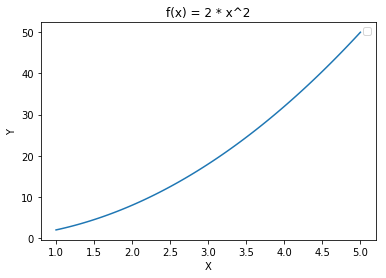

('Precise value:', 82.66666666666666)
('Rectangular rule:', 81.70879999999998, 'Relative error:', 0.011587096774193648)
('Trapezoidal rule:', 82.66879999999999, 'Relative error:', 2.5806451612900386e-05)
("Simpson's rule:", 82.66666666666667, 'Relative error:', 1.7190550058712103e-16)


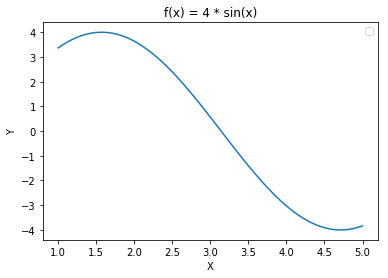

('Precise value:', 1.0265604816196536)
('Rectangular rule:', 1.1704552239963206, 'Relative error:', 0.1401717141396651)
('Trapezoidal rule:', 1.026423603238639, 'Relative error:', 0.00013333688902456787)
("Simpson's rule:", 1.0265604962224044, 'Relative error:', 1.4224929799862103e-08)


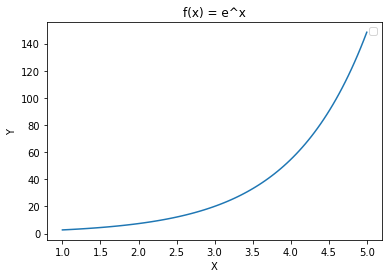

('Precise value:', 145.69487727411754)
('Rectangular rule:', 142.8004051942652, 'Relative error:', 0.019866670222087025)
('Trapezoidal rule:', 145.71430273974758, 'Relative error:', 0.00013332977791310986)
("Simpson's rule:", 145.69487934582787, 'Relative error:', 1.4219513860789075e-08)


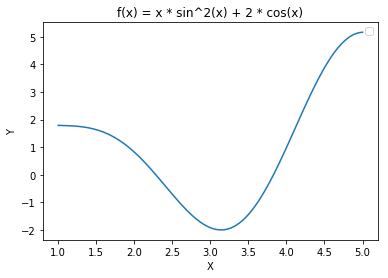

('Precise value:', 3.3594258129422263)
('Rectangular rule:', 3.2919236598565385, 'Relative error:', 0.020093360247943275)
('Trapezoidal rule:', 3.359450163128693, 'Relative error:', 7.248317963423358e-06)
("Simpson's rule:", 3.3594259322159044, 'Relative error:', 3.550418574085315e-08)


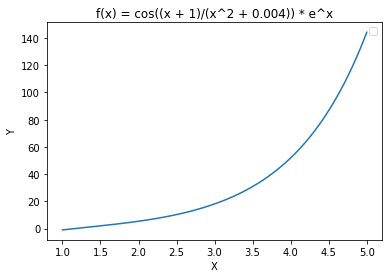

('Precise value:', 135.71714406473345)
('Rectangular rule:', 132.83360702114572, 'Relative error:', 0.02124666757069654)
('Trapezoidal rule:', 135.73582233921027, 'Relative error:', 0.00013762649225743754)
("Simpson's rule:", 135.71714693780578, 'Relative error:', 2.1169560800376046e-08)


In [7]:
calculate(1, 5, 100)

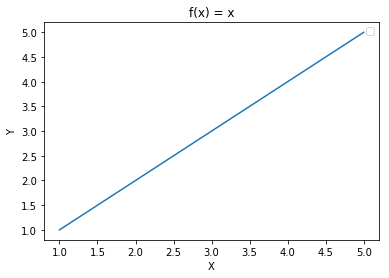

('Precise value:', 12.0)
('Rectangular rule:', 11.992000000000003, 'Relative error:', 0.0006666666666664453)
('Trapezoidal rule:', 12.000000000000002, 'Relative error:', 1.4802973661668753e-16)
("Simpson's rule:", 11.999999999999996, 'Relative error:', 2.9605947323337506e-16)


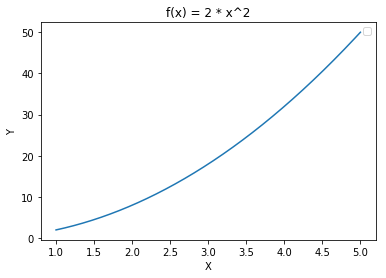

('Precise value:', 82.66666666666666)
('Rectangular rule:', 82.57068800000008, 'Relative error:', 0.0011610322580634927)
('Trapezoidal rule:', 82.66668800000005, 'Relative error:', 2.58064516852726e-07)
("Simpson's rule:", 82.66666666666664, 'Relative error:', 1.7190550058712103e-16)


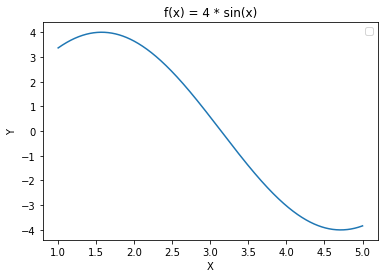

('Precise value:', 1.0265604816196536)
('Rectangular rule:', 1.0409622749477478, 'Relative error:', 0.014029171769179947)
('Trapezoidal rule:', 1.026559112871981, 'Relative error:', 1.3333336876333353e-06)
("Simpson's rule:", 1.0265604816211142, 'Relative error:', 1.4228186622695456e-12)


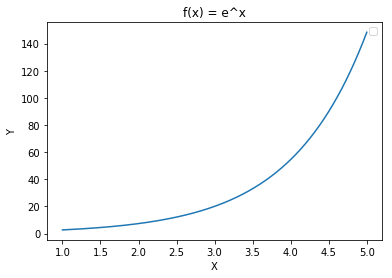

('Precise value:', 145.69487727411754)
('Rectangular rule:', 145.4036817793539, 'Relative error:', 0.0019986666670221104)
('Trapezoidal rule:', 145.6950715339021, 'Relative error:', 1.3333329777863112e-06)
("Simpson's rule:", 145.6948772743247, 'Relative error:', 1.4219157455237273e-12)


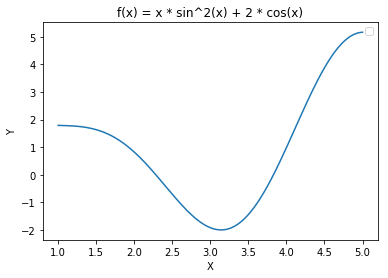

('Precise value:', 3.3594258129422263)
('Rectangular rule:', 3.352673406411877, 'Relative error:', 0.0020099882855980186)
('Trapezoidal rule:', 3.3594260567390926, 'Relative error:', 7.257099273075295e-08)
("Simpson's rule:", 3.3594258129541448, 'Relative error:', 3.5477688383651615e-12)


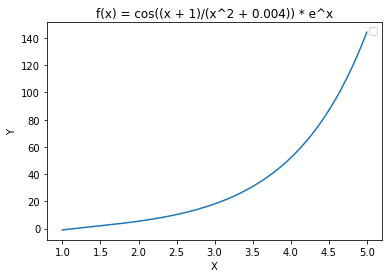

('Precise value:', 135.71714406473345)
('Rectangular rule:', 135.42710932281486, 'Relative error:', 0.002137053088740582)
('Trapezoidal rule:', 135.7173308546213, 'Relative error:', 1.3763175547948538e-06)
("Simpson's rule:", 135.7171440650247, 'Relative error:', 2.146122954840947e-12)


In [8]:
calculate(1, 5, 1000)

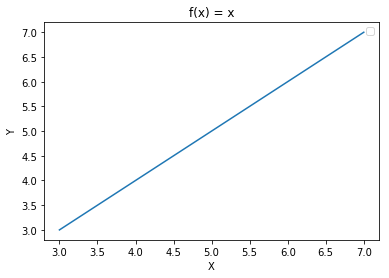

('Precise value:', 20.0)
('Rectangular rule:', 19.200000000000003, 'Relative error:', 0.039999999999999855)
('Trapezoidal rule:', 20.000000000000004, 'Relative error:', 1.7763568394002506e-16)
("Simpson's rule:", 20.0, 'Relative error:', 0.0)


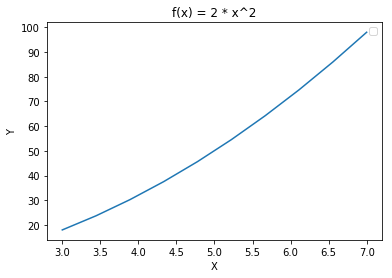

('Precise value:', 210.66666666666666)
('Rectangular rule:', 194.88000000000002, 'Relative error:', 0.07493670886075934)
('Trapezoidal rule:', 210.88000000000002, 'Relative error:', 0.0010126582278482596)
("Simpson's rule:", 210.66666666666666, 'Relative error:', 0.0)


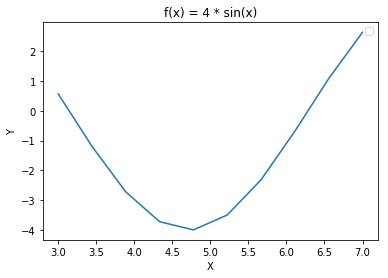

('Precise value:', -6.975579003775)
('Rectangular rule:', -7.295015587029979, 'Relative error:', 0.04579355822392785)
('Trapezoidal rule:', -6.882322314502841, 'Relative error:', 0.013369024882621303)
("Simpson's rule:", -6.976590305672759, 'Relative error:', 0.0001449774846234329)


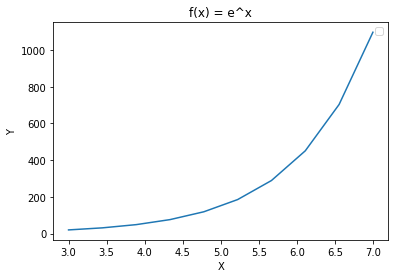

('Precise value:', 1076.5476215052709)
('Rectangular rule:', 875.5539334793544, 'Relative error:', 0.18670208731210533)
('Trapezoidal rule:', 1090.8634577804087, 'Relative error:', 0.013297912687894722)
("Simpson's rule:", 1076.6978623449445, 'Relative error:', 0.00013955800623438299)


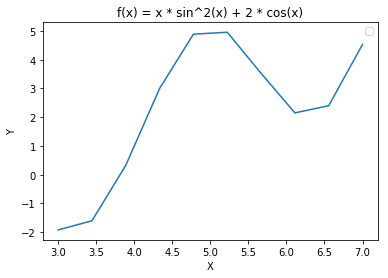

('Precise value:', 9.19153781875794)
('Rectangular rule:', 7.998277248332489, 'Relative error:', 0.12982164616570088)
('Trapezoidal rule:', 9.288170181959613, 'Relative error:', 0.010513187793719028)
("Simpson's rule:", 9.186103544529525, 'Relative error:', 0.0005912257921982402)


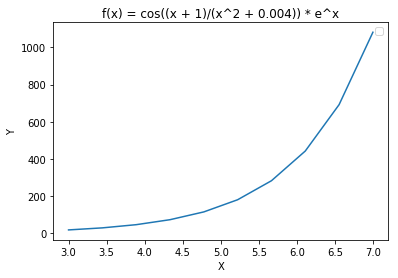

('Precise value:', 1054.6301111510954)
('Rectangular rule:', 856.0345046344137, 'Relative error:', 0.18830830299347412)
('Trapezoidal rule:', 1068.8189984156486, 'Relative error:', 0.01345389925294892)
("Simpson's rule:", 1054.7795274642808, 'Relative error:', 0.00014167650971230156)


In [9]:
calculate(3, 7, 10)

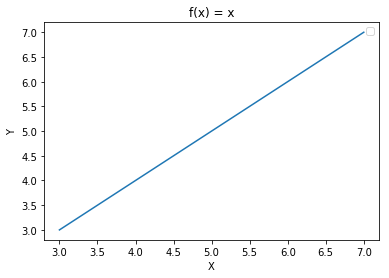

('Precise value:', 20.0)
('Rectangular rule:', 19.92, 'Relative error:', 0.003999999999999915)
('Trapezoidal rule:', 20.0, 'Relative error:', 0.0)
("Simpson's rule:", 20.000000000000004, 'Relative error:', 1.7763568394002506e-16)


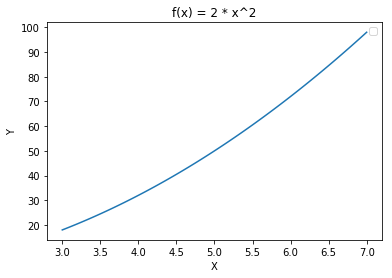

('Precise value:', 210.66666666666666)
('Rectangular rule:', 209.06880000000004, 'Relative error:', 0.00758481012658205)
('Trapezoidal rule:', 210.66880000000006, 'Relative error:', 1.0126582278817181e-05)
("Simpson's rule:", 210.6666666666667, 'Relative error:', 2.698263553519368e-16)


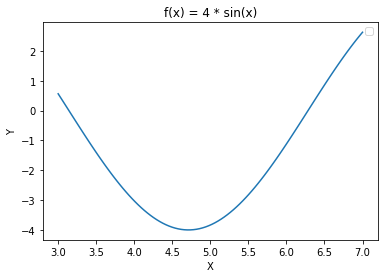

('Precise value:', -6.975579003775)
('Rectangular rule:', -7.0159182290242095, 'Relative error:', 0.0057829214216309965)
('Trapezoidal rule:', -6.974648901771495, 'Relative error:', 0.00013333688902401972)
("Simpson's rule:", -6.975579103002135, 'Relative error:', 1.4224931708097661e-08)


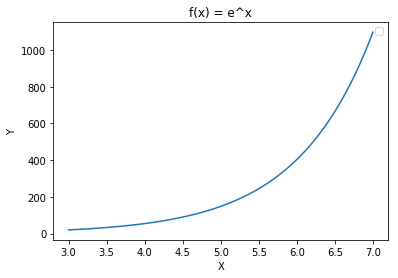

('Precise value:', 1076.5476215052709)
('Rectangular rule:', 1055.1602049304536, 'Relative error:', 0.019866670222086935)
('Trapezoidal rule:', 1076.691157360559, 'Relative error:', 0.00013332977791299832)
("Simpson's rule:", 1076.547636813255, 'Relative error:', 1.4219514102183449e-08)


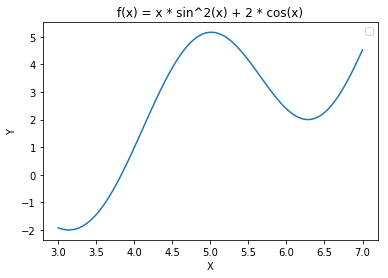

('Precise value:', 9.19153781875794)
('Rectangular rule:', 9.063502314035098, 'Relative error:', 0.013929715271534769)
('Trapezoidal rule:', 9.19249160739781, 'Relative error:', 0.00010376812440723975)
("Simpson's rule:", 9.191537320572788, 'Relative error:', 5.420041364368179e-08)


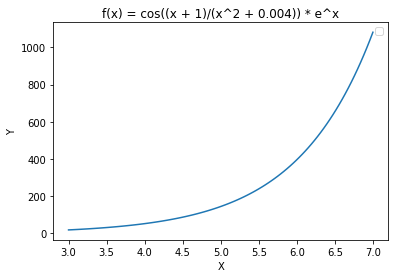

('Precise value:', 1054.6301111510954)
('Rectangular rule:', 1033.4939260728618, 'Relative error:', 0.020041325252096384)
('Trapezoidal rule:', 1054.7723754509852, 'Relative error:', 0.00013489497254589642)
("Simpson's rule:", 1054.630126375388, 'Relative error:', 1.4435670335607947e-08)


In [65]:
calculate(3, 7, 100)

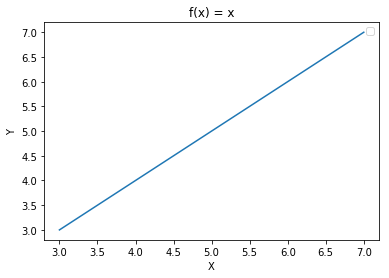

('Precise value:', 20.0)
('Rectangular rule:', 19.991999999999997, 'Relative error:', 0.0004000000000001336)
('Trapezoidal rule:', 19.999999999999996, 'Relative error:', 1.7763568394002506e-16)
("Simpson's rule:", 20.0, 'Relative error:', 0.0)


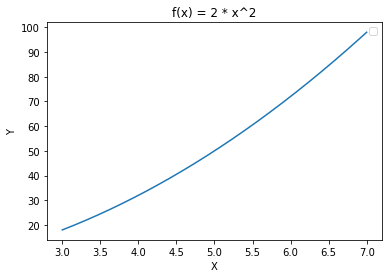

('Precise value:', 210.66666666666666)
('Rectangular rule:', 210.5066879999997, 'Relative error:', 0.00075939240506461)
('Trapezoidal rule:', 210.6666879999997, 'Relative error:', 1.0126582144983309e-07)
("Simpson's rule:", 210.66666666666666, 'Relative error:', 0.0)


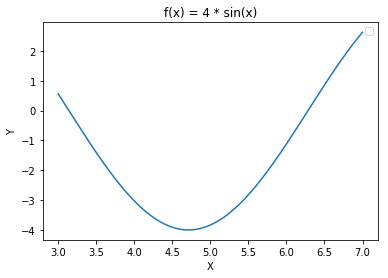

('Precise value:', -6.975579003775)
('Rectangular rule:', -6.9796966357257855, 'Relative error:', 0.0005902924973765612)
('Trapezoidal rule:', -6.975569703000515, 'Relative error:', 1.3333336888258531e-06)
("Simpson's rule:", -6.975579003784917, 'Relative error:', 1.421731476197827e-12)


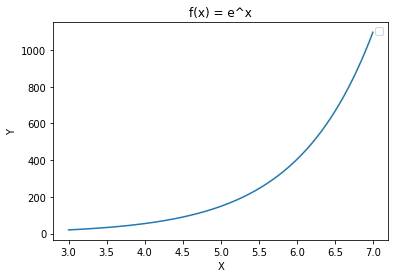

('Precise value:', 1076.5476215052709)
('Rectangular rule:', 1074.3959616587058, 'Relative error:', 0.0019986666670226056)
('Trapezoidal rule:', 1076.5490569017163, 'Relative error:', 1.3333329773665835e-06)
("Simpson's rule:", 1076.547621506802, 'Relative error:', 1.4222634464547263e-12)


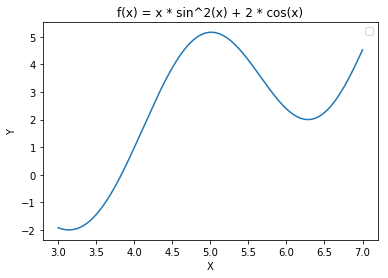

('Precise value:', 9.19153781875794)
('Rectangular rule:', 9.178648426075897, 'Relative error:', 0.0014023107924049825)
('Trapezoidal rule:', 9.191547355412167, 'Relative error:', 1.0375471890832428e-06)
("Simpson's rule:", 9.191537818708168, 'Relative error:', 5.414952673271088e-12)


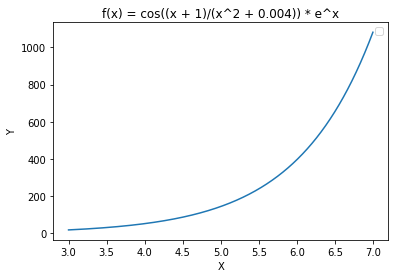

('Precise value:', 1054.6301111510954)
('Rectangular rule:', 1052.5036888939692, 'Relative error:', 0.0020162730370037775)
('Trapezoidal rule:', 1054.6315338317816, 'Relative error:', 1.3489854604720389e-06)
("Simpson's rule:", 1054.630111152618, 'Relative error:', 1.4436285430027479e-12)


In [66]:
calculate(3, 7, 1000)

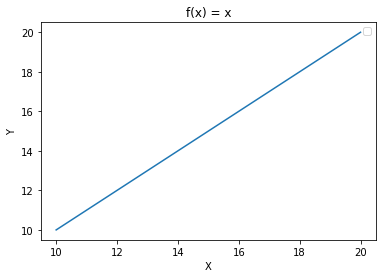

('Precise value:', 150.00000000000003)
('Rectangular rule:', 145.0, 'Relative error:', 0.03333333333333351)
('Trapezoidal rule:', 150.0, 'Relative error:', 1.8947806286936001e-16)
("Simpson's rule:", 150.0, 'Relative error:', 1.8947806286936001e-16)


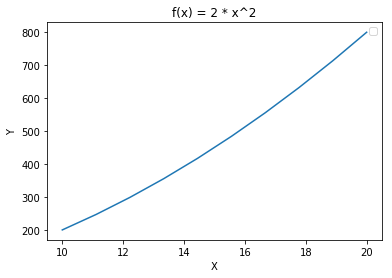

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4370.0, 'Relative error:', 0.06357142857142845)
('Trapezoidal rule:', 4670.0, 'Relative error:', 0.0007142857142858443)
("Simpson's rule:", 4666.666666666666, 'Relative error:', 0.0)


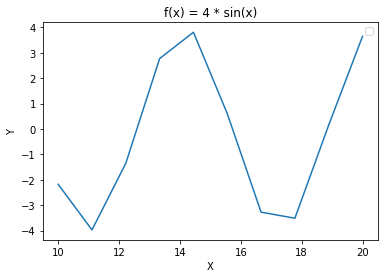

('Precise value:', -4.988614363559377)
('Rectangular rule:', -7.479731393660902, 'Relative error:', 0.4993605134721443)
('Trapezoidal rule:', -4.565798670426908, 'Relative error:', 0.08475613914377428)
("Simpson's rule:", -5.020014078374073, 'Relative error:', 0.0062942758301910776)


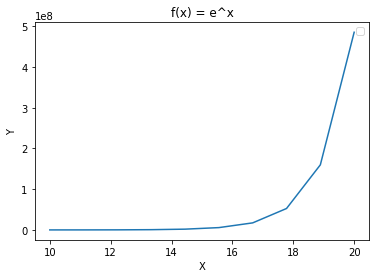

('Precise value:', 485143168.9439956)
('Rectangular rule:', 282342023.82217574, 'Relative error:', 0.41802329313067377)
('Trapezoidal rule:', 524913608.2941735, 'Relative error:', 0.08197670686932612)
("Simpson's rule:", 487548111.27808815, 'Relative error:', 0.004957180659324467)


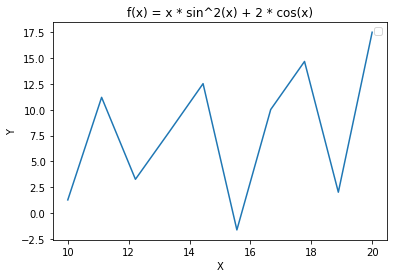

('Precise value:', 76.60510756308955)
('Rectangular rule:', 68.82801927179602, 'Relative error:', 0.10152179846348443)
('Trapezoidal rule:', 76.93006832548066, 'Relative error:', 0.004242024751724122)
("Simpson's rule:", 76.29272720800464, 'Relative error:', 0.0040778006195950475)


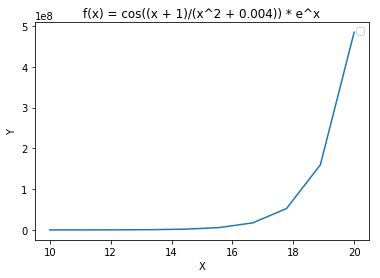

('Precise value:', 484390851.4285346)
('Rectangular rule:', 281874617.8067484, 'Relative error:', 0.4180843486711986)
('Trapezoidal rule:', 524112103.24669456, 'Relative error:', 0.08200248146928571)
("Simpson's rule:", 486793325.1731181, 'Relative error:', 0.004959783483726551)


In [67]:
calculate(10, 20, 10)

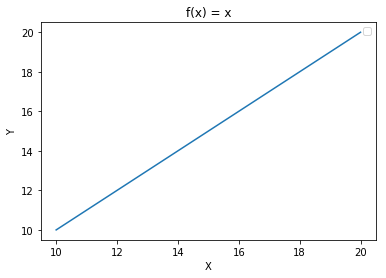

('Precise value:', 150.00000000000003)
('Rectangular rule:', 149.5, 'Relative error:', 0.003333333333333522)
('Trapezoidal rule:', 150.0, 'Relative error:', 1.8947806286936001e-16)
("Simpson's rule:", 150.0, 'Relative error:', 1.8947806286936001e-16)


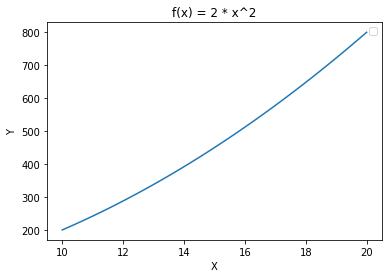

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4636.700000000001, 'Relative error:', 0.0064214285714282865)
('Trapezoidal rule:', 4666.700000000001, 'Relative error:', 7.142857143142985e-06)
("Simpson's rule:", 4666.666666666667, 'Relative error:', 1.9489172180848464e-16)


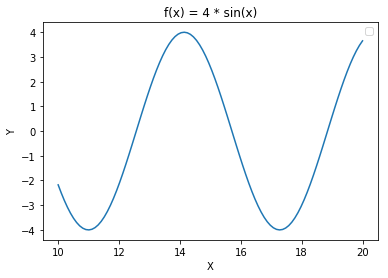

('Precise value:', -4.988614363559377)
('Rectangular rule:', -5.27584976421836, 'Relative error:', 0.057578193006291994)
('Trapezoidal rule:', -4.984456491894959, 'Relative error:', 0.0008334722553000718)
("Simpson's rule:", -4.988617138314615, 'Relative error:', 5.562176259385511e-07)


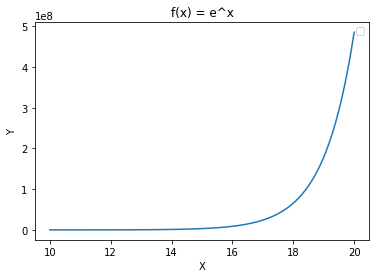

('Precise value:', 485143168.9439956)
('Rectangular rule:', 461290229.10595936, 'Relative error:', 0.049166805522494736)
('Trapezoidal rule:', 485547387.5531592, 'Relative error:', 0.0008331944775053504)
("Simpson's rule:", 485143438.1474532, 'Relative error:', 5.548948739809926e-07)


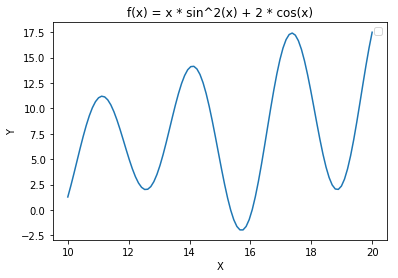

('Precise value:', 76.60510756308955)
('Rectangular rule:', 75.79773668372772, 'Relative error:', 0.010539387059758404)
('Trapezoidal rule:', 76.60794158909617, 'Relative error:', 3.6995261762283914e-05)
("Simpson's rule:", 76.60509268204828, 'Relative error:', 1.9425651552717097e-07)


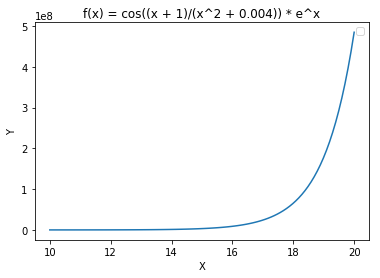

('Precise value:', 484390851.4285346)
('Rectangular rule:', 460570823.027565, 'Relative error:', 0.04917522354256096)
('Trapezoidal rule:', 484794571.5715594, 'Relative error:', 0.000833459471487078)
("Simpson's rule:", 484391120.3606285, 'Relative error:', 5.551964762868693e-07)


In [68]:
calculate(10, 20, 100)

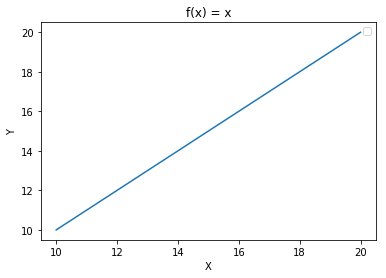

('Precise value:', 150.00000000000003)
('Rectangular rule:', 149.95, 'Relative error:', 0.0003333333333335985)
('Trapezoidal rule:', 149.99999999999997, 'Relative error:', 3.7895612573872002e-16)
("Simpson's rule:", 150.00000000000003, 'Relative error:', 0.0)


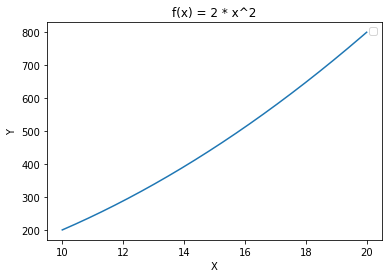

('Precise value:', 4666.666666666666)
('Rectangular rule:', 4663.667, 'Relative error:', 0.000642785714285505)
('Trapezoidal rule:', 4666.667, 'Relative error:', 7.142857163801508e-08)
("Simpson's rule:", 4666.666666666666, 'Relative error:', 0.0)


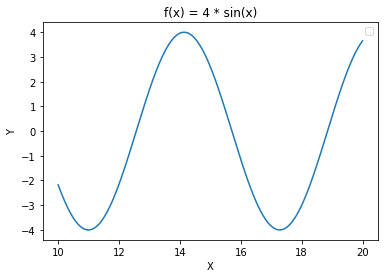

('Precise value:', -4.988614363559377)
('Rectangular rule:', -5.017712118936071, 'Relative error:', 0.005832833178937595)
('Trapezoidal rule:', -4.988572791703732, 'Relative error:', 8.333347221362644e-06)
("Simpson's rule:", -4.988614363836528, 'Relative error:', 5.555665894349844e-11)


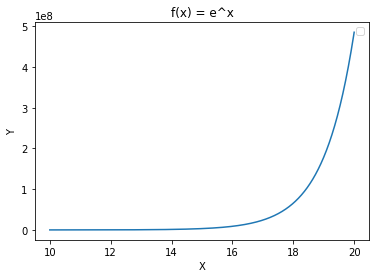

('Precise value:', 485143168.9439956)
('Rectangular rule:', 482721495.95227855, 'Relative error:', 0.004991666680555892)
('Trapezoidal rule:', 485147211.7969985, 'Relative error:', 8.33331944404343e-06)
("Simpson's rule:", 485143168.9709477, 'Relative error:', 5.555491575372924e-11)


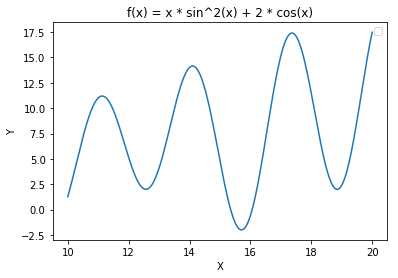

('Precise value:', 76.60510756308955)
('Rectangular rule:', 76.52411537615613, 'Relative error:', 0.0010572687580486992)
('Trapezoidal rule:', 76.60513586669298, 'Relative error:', 3.694741033510174e-07)
("Simpson's rule:", 76.60510756161014, 'Relative error:', 1.9312117250837312e-11)


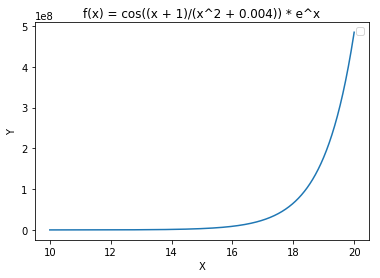

('Precise value:', 484390851.4285346)
('Rectangular rule:', 481972514.44180465, 'Relative error:', 0.004992532331273339)
('Trapezoidal rule:', 484394889.29620415, 'Relative error:', 8.335970131588036e-06)
("Simpson's rule:", 484390851.45545965, 'Relative error:', 5.5585334221419144e-11)


In [69]:
calculate(10, 20, 1000)